In [72]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='once')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import datetime as dt 
from datetime import datetime, timedelta

### Chargement des données 

In [73]:
merged = pd.read_csv('../data_CROUS/data_processed/merged_one_hot/merged_Forms_Choix.csv' , sep=",", encoding='latin-1')

# On charge les données pour acceder à qui a mangé quel jour (Données journélières non catégorisées)
oct_21 = pd.read_csv('../data_CROUS/data_processed/one_hot/Resultats_choix_21_octobre_onehot.csv' , sep=";")
oct_22 = pd.read_csv('../data_CROUS/data_processed/one_hot/Resultats_choix_22_octobre_onehot.csv' , sep=";")
oct_28 = pd.read_csv('../data_CROUS/data_processed/one_hot/Resultats_choix_28_octobre_onehot.csv' , sep=";")
oct_29 = pd.read_csv('../data_CROUS/data_processed/one_hot/Resultats_choix_29_octobre_onehot.csv' , sep=";")

oct_21['Horodateur'] = oct_21['Horodateur'].replace(' ', '', regex = True)
oct_22['Horodateur'] = oct_22['Horodateur'].replace(' ', '', regex = True)
oct_28['Horodateur'] = oct_28['Horodateur'].replace(' ', '', regex = True)
oct_29['Horodateur'] = oct_29['Horodateur'].replace(' ', '', regex = True)

# il y a des coquilles 
for i, item in enumerate(oct_21['Horodateur']):
    if len(item) == 9:
        #print(item) # on observe qu'un 3 s'est introduit dans les minutes 
        item = item[:5] + item[6:]
        oct_21.at[i, 'Horodateur'] = item
for i, item in enumerate(oct_22['Horodateur']):
    if len(item) == 9:
        #print(item) # on observe qu'un 3 s'est introduit dans les minutes 
        item = item[:5] + item[6:]
        oct_22.at[i, 'Horodateur'] = item

for i, item in enumerate(oct_28['Horodateur']):
    if len(item) == 9:
        #print(item) # on observe qu'un 3 s'est introduit dans les minutes 
        item = item[:5] + item[6:]
        oct_28.at[i, 'Horodateur'] = item

for i, item in enumerate(oct_29['Horodateur']):
    if len(item) == 9:
        #print(item) # on observe qu'un 3 s'est introduit dans les minutes 
        item = item[:5] + item[6:]
        oct_29.at[i, 'Horodateur'] = item


In [74]:
print(oct_21.columns)
print(oct_21.columns[14:22])
print(oct_21.columns[3:])

Index(['Unnamed: 0', 'Horodateur', 'Numéro de formulaire ',
       'chouxblancàlajaponaise', 'saladelentilles', 'champignons',
       'carottesrâpées', 'oeufmimosa', 'saladepates', 'artichauts', 'salami',
       'coeursdepalmiers', 'tomates', 'torsades', 'feuilletésaumonoseille',
       'boeufbourguignon', 'kebab', 'risottocourgettes', 'pizzaraclette',
       'faux-filet', 'pizzamerguezpoivrons', 'hamburger', 'escalopeviennoise',
       'poeléebrocolis', 'frites', 'ratatouille', 'yaourtauxfruits',
       'ufàlaneige', 'faissellenature', 'yaourtnaturesucré',
       'fromageblancfruitsrouges', 'banane', 'mimolette', 'flancchocolat',
       'orange', 'pommegolden', 'kiwi'],
      dtype='object')
Index(['feuilletésaumonoseille', 'boeufbourguignon', 'kebab',
       'risottocourgettes', 'pizzaraclette', 'faux-filet',
       'pizzamerguezpoivrons', 'hamburger'],
      dtype='object')
Index(['chouxblancàlajaponaise', 'saladelentilles', 'champignons',
       'carottesrâpées', 'oeufmimosa', 'sa

In [75]:
cols_to_merge = ['torsades', 'feuilletésaumonoseille','boeufbourguignon', 'risottocourgettes','faux-filet', 'escalopeviennoise','poeléebrocolis', 'ratatouille']

oct_21_bis = oct_21
oct_21_bis['plat'] = oct_21[cols_to_merge].any(axis=1).astype(int)
oct_21_bis = oct_21_bis.drop(columns = cols_to_merge)
oct_21_bis = oct_21_bis.drop(columns = ['frites'])
oct_21_bis["kebab"] = oct_21_bis["kebab"].replace(1, 2)
oct_21_bis['pizzaraclette'] = oct_21_bis['pizzaraclette'].replace(1, 2)
oct_21_bis['pizzamerguezpoivrons'] = oct_21_bis['pizzamerguezpoivrons'].replace(1, 2)
oct_21_bis['hamburger'] = oct_21_bis['hamburger'].replace(1, 2)

print(oct_21_bis.columns)

Index(['Unnamed: 0', 'Horodateur', 'Numéro de formulaire ',
       'chouxblancàlajaponaise', 'saladelentilles', 'champignons',
       'carottesrâpées', 'oeufmimosa', 'saladepates', 'artichauts', 'salami',
       'coeursdepalmiers', 'tomates', 'kebab', 'pizzaraclette',
       'pizzamerguezpoivrons', 'hamburger', 'yaourtauxfruits', 'ufàlaneige',
       'faissellenature', 'yaourtnaturesucré', 'fromageblancfruitsrouges',
       'banane', 'mimolette', 'flancchocolat', 'orange', 'pommegolden', 'kiwi',
       'plat'],
      dtype='object')


In [92]:
df = pd.read_csv('/Users/helenephilippe/Desktop/Projet_MIChoCo/data_CROUS/data_clean/Resultats_choix_21_octobre_cleaned.csv', sep = ';', index_col=False, encoding='latin-1')
print(df.columns)

def count_plus(string):
    nb_plus = string.count("+")
    if nb_plus == 2:
        return 3
    elif nb_plus == 1:
        return 2
    elif  string == 'pasdentrÃ©e' or string == 'pasdedessert':
        return 0
    else:
        return 1

def count_plat_point(string):
    if 'kebab' in string or 'faux' in string or 'hamburger' in string:
        return 8
    elif 'pizza' in string:
        return 6
    else : 
        return 1


nb_entrees = []
nb_desserts = []
over = 0
for ligne in df['NumÃ©ro de formulaire ']:
    try : 
        #print(type(np.array(oct_21.loc[oct_21['Numéro de formulaire ']== ligne])))
        
        l = np.array(df.loc[df['NumÃ©ro de formulaire ']== ligne]).flatten()
        l = l[3:]
        nb_entrees.append(count_plus(l[0]))
        nb_desserts.append(count_plus(l[2]))
        # print(count_plus(l[0]), count_plus(l[2]), count_plat_point(l[1]) , count_plus(l[0]) + count_plus(l[2]) + count_plat_point(l[1]))
        if (count_plus(l[0]) + count_plus(l[2]) + count_plat_point(l[1])) > 4:
            over+=1
    except:
        pass

p_2_entrees = np.where(np.array(nb_entrees)==2, True, False).sum() / len(nb_entrees)
print('probabilité de prendre 2 entrées : ')
print(p_2_entrees)
p_3_entrees = np.where(np.array(nb_entrees)==3, True, False).sum() / len(nb_entrees)
print('probabilité de prendre 3 entrées : ')
print(p_3_entrees)

p_2_desserts = np.where(np.array(nb_desserts)==2, True, False).sum() / len(nb_desserts)
print('probabilité de prendre 2 desserts : ')
print(p_2_desserts)
p_3_desserts = np.where(np.array(nb_desserts)==3, True, False).sum() / len(nb_desserts)
print('probabilité de prendre 3 desserts : ')
print(p_3_desserts)

print("probabilité de dépasser : ")
depassement = over/len(df['NumÃ©ro de formulaire '])
print(depassement)


Index(['Unnamed: 0', 'Horodateur', 'NumÃ©ro de formulaire ', 'ENTREE', 'PLAT ',
       'DESSERT'],
      dtype='object')
probabilité de prendre 2 entrées : 
0.07633587786259542
probabilité de prendre 3 entrées : 
0.0
probabilité de prendre 2 desserts : 
0.44274809160305345
probabilité de prendre 3 desserts : 
0.10687022900763359
probabilité de dépasser : 
0.1297709923664122


21 octobre :   
- probabilité de prendre 2 entrées : 
0.07633587786259542
- probabilité de prendre 3 entrées : 
0.0
- probabilité de prendre 2 desserts : 
0.44274809160305345
- probabilité de prendre 3 desserts : 
0.10687022900763359
- probabilité de dépasser : 
0.1297709923664122


22  octobre :
- probabilité de prendre 2 entrées : 
0.043478260869565216
- probabilité de prendre 3 entrées : 
0.014492753623188406
- probabilité de prendre 2 desserts : 
0.463768115942029
- probabilité de prendre 3 desserts : 
0.057971014492753624
- probabilité de dépasser : 
0.07246376811594203  

28 Octobre : 
- probabilité de prendre 2 entrées : 
0.04242424242424243
- probabilité de prendre 3 entrées : 
0.0
- probabilité de prendre 2 desserts : 
0.45454545454545453
- probabilité de prendre 3 desserts : 
0.03636363636363636
- probabilité de dépasser : 
0.1



29 Octobre :
- probabilité de prendre 2 entrées : 
0.0
- probabilité de prendre 3 entrées : 
0.0
- probabilité de prendre 2 desserts : 
0.417910447761194
- probabilité de prendre 3 desserts : 
0.014925373134328358
- probabilité de dépasser : 
0.08955223880597014



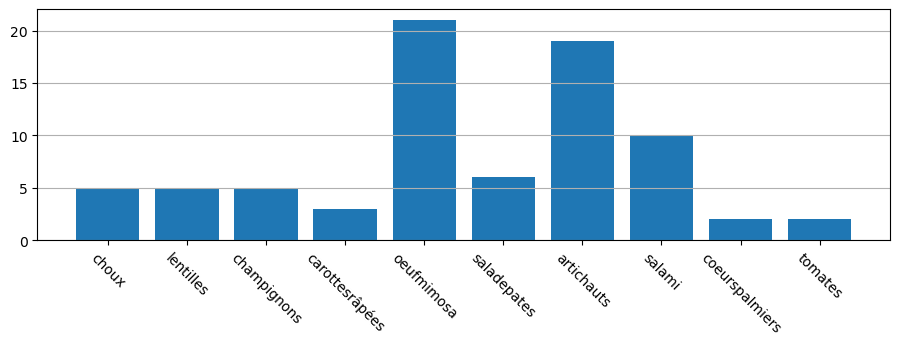

[19, 34, 60, 2, 2, 2, 10, 1, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


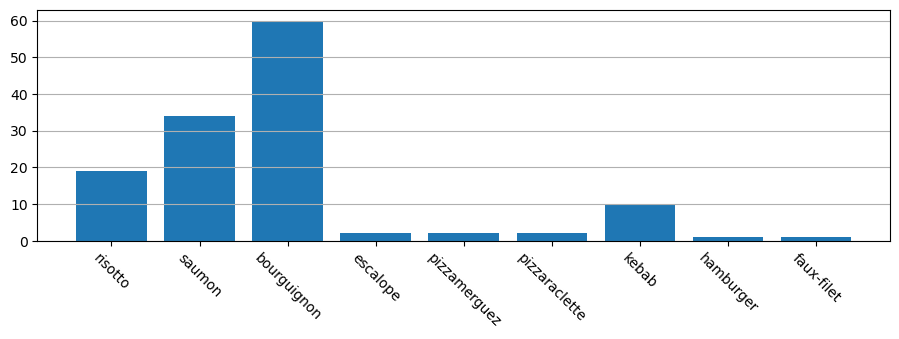

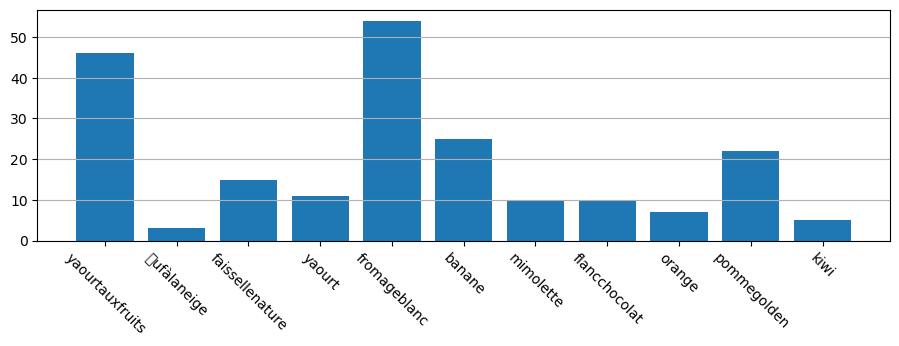

In [104]:
''' 
Tentons dans un premier temps de reproduire le graphe output de GAMA.
Trois bar plots : Pour les entrées, les plats ou les desserts 
''' 

# I - Les entrées 
entrees = [ 'saladepates',  'artichauts','carottesrâpées', 'salami','oeufmimosa','chouxblancàlajaponaise', 'saladelentilles', 'champignons', 
       'coeursdepalmiers', 'tomates']
label_plats = ['choux', 'lentilles', 'champignons',
       'carottesrâpées', 'oeufmimosa', 'saladepates', 'artichauts', 'salami',
       'coeurspalmiers', 'tomates']

choix = [oct_21[col].sum() for col in entrees]

fig = plt.figure(figsize=(11,3))
plt.bar(entrees, choix)
plt.grid(axis = 'y')
plt.xticks(ticks = [i for i in range(0, len(entrees))], labels =label_plats,  rotation= -45)
fig.savefig('figures/entrees', bbox_inches='tight')
plt.show()


# II - Les plats 
plats = ['risottocourgettes', 'feuilletésaumonoseille','boeufbourguignon', 'escalopeviennoise', 'pizzamerguezpoivrons','pizzaraclette', 'kebab','hamburger', 'faux-filet']
label_plats = ['risotto', 'saumon','bourguignon', 'escalope', 'pizzamerguez','pizzaraclette', 'kebab','hamburger', 'faux-filet']
choix = [oct_21[col].sum() for col in plats]
print(choix)


fig = plt.figure(figsize=(11,3))
plt.bar(plats, choix)
plt.grid(axis = 'y')
plt.xticks(ticks = [i for i in range(0, len(plats))], labels =label_plats,  rotation= -45)
print([i for i in range(1, len(plats)+1)])
fig.savefig('figures/plats', bbox_inches='tight')
plt.show()

# III - Les desserts 
desserts = ['yaourtauxfruits', 'ufàlaneige',
       'faissellenature', 'yaourtnaturesucré', 'fromageblancfruitsrouges',
       'banane', 'mimolette', 'flancchocolat', 'orange', 'pommegolden', 'kiwi']
label_desserts = ['yaourtauxfruits', 'ufàlaneige',
       'faissellenature', 'yaourt', 'fromageblanc',
       'banane', 'mimolette', 'flancchocolat', 'orange', 'pommegolden', 'kiwi']

choix = [oct_21[col].sum() for col in desserts]


fig = plt.figure(figsize=(11,3))
plt.bar(desserts, choix)
plt.grid(axis = 'y')
plt.xticks(ticks = [i for i in range(0, len(desserts))], labels =label_desserts,  rotation= -45)
fig.savefig('figures/desserts', bbox_inches='tight')
plt.show()


In [ ]:
# Données journalières ET catégorisées ET horodatées 

# Dans un premier temps, nous devons recréer les données catégorielles pour chacun des jours 
merged_cat = pd.read_csv('../data_CROUS/data_processed/merged_one_hot/merged_Forms_Choix_regrmt_Hélène.csv' , sep=";", encoding='latin-1')
# On crée la liste des num form des gens qui ont mangé le même jour 
nf_oct_21 = list(oct_21['Numéro de formulaire '])
nf_oct_22 = list(oct_22['Numéro de formulaire '])
nf_oct_28 = list(oct_28['Numéro de formulaire '])
nf_oct_29 = list(oct_29['Numéro de formulaire '])

oct_21_cat = merged_cat[merged_cat['index'].isin(nf_oct_21)]
oct_22_cat = merged_cat[merged_cat['index'].isin(nf_oct_22)]
oct_28_cat = merged_cat[merged_cat['index'].isin(nf_oct_28)]
oct_29_cat = merged_cat[merged_cat['index'].isin(nf_oct_29)]


print(oct_21_cat.shape)
print(oct_22_cat.shape)
print(oct_28_cat.shape)
print(oct_29_cat.shape)

# Il faut maintenant ajouter la colonne horodateur 
oct_21_cat = pd.merge(oct_21_cat, merged[['index', 'Horodateur']], on =  'index', how = 'left')
oct_22_cat = pd.merge(oct_22_cat, merged[['index', 'Horodateur']], on =  'index', how = 'left')
oct_28_cat = pd.merge(oct_28_cat, merged[['index', 'Horodateur']], on =  'index', how = 'left')
oct_29_cat = pd.merge(oct_29_cat, merged[['index', 'Horodateur']], on =  'index', how = 'left')

print(oct_21_cat.shape)
print(oct_22_cat.shape)
print(oct_28_cat.shape)
print(oct_29_cat.shape)

print(oct_21_cat.columns)